In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

import preprocess as preproc
import util as utility
import model as md

X_train size:  (64891, 13)


C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.9955002157430808
[[16150     0]
 [   73     0]]


C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

CV with K-Fold roc_auc score: 0.787 (+/- 0.04)


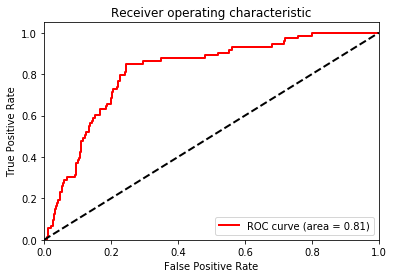

In [3]:
processed_df = pd.read_csv("data store/training_dataset_processed.csv")

y = processed_df["BK"]
X = processed_df.drop(["BK"], axis=1)

lr_model = md.logistic_regression()
holdout_lr = md.train_tuning(lr_model, X, y)
kfold_lr = md.train_kfold_cv(lr_model, X, y, 5, "roc_auc")
md.roc_auc_plot(kfold_lr, X, y)
display()

X_train size:  (64891, 13)
Accuracy :  0.08937927633606609
[[ 1379 14771]
 [    2    71]]
CV with K-Fold roc_auc score: 0.695 (+/- 0.08)


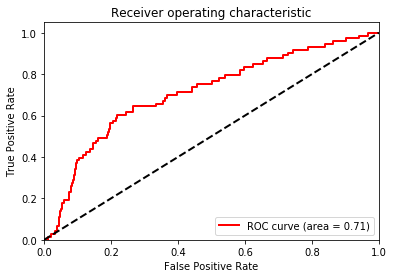

In [4]:
NB_model = md.naive_bayes()
holdout_nb = md.train_tuning(NB_model, X, y)
kfold_nb = md.train_kfold_cv(NB_model, X, y, 5, "roc_auc")
md.roc_auc_plot(kfold_nb, X, y)
display()

X_train size:  (64891, 13)


C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy :  0.9951920113419219
[[16142     8]
 [   70     3]]


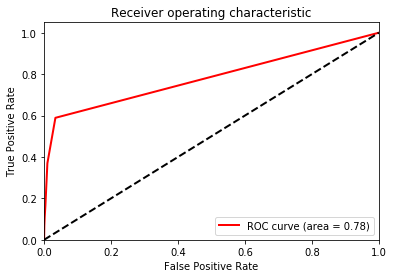

In [5]:
RF_model = md.random_forest()
#RF_params = {'n_estimators': [80, 100, 120], 'max_depth': [3,4,5], 'max_leaf_nodes': [14, 16]}
RF_params={}

RF_tuned = md.train_tuning(RF_model, X, y, RF_params, "roc_auc")
md.roc_auc_plot(RF_tuned, X, y)
display()

X_train size:  (64891, 13)
Accuracy :  0.9942057572582137
[[16122    28]
 [   66     7]]
CV with K-Fold roc_auc score: 0.939 (+/- 0.01)


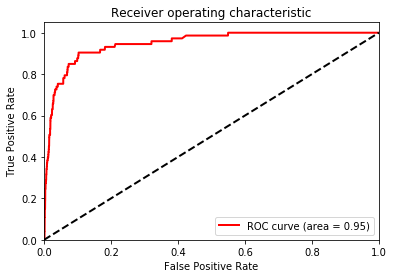

In [6]:
GB_model = md.gradient_boosting()
holdout_GB = md.train_tuning(GB_model, X, y)
kfold_GB = md.train_kfold_cv(GB_model, X, y, 5, "roc_auc")
md.roc_auc_plot(kfold_GB, X, y)
display()

X_train size:  (64891, 13)
Accuracy :  0.9955002157430808
[[16150     0]
 [   73     0]]


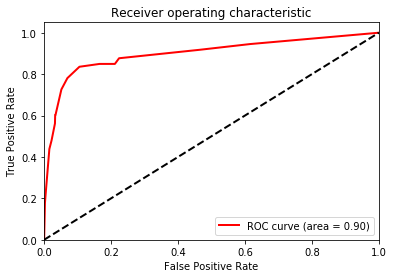

In [7]:
DT_model = md.decision_tree()
DT_param = {'max_depth': [2,3,4,5,6,7,8], 'criterion': ["gini", "entropy"], 'max_leaf_nodes': [5, 10, 20]}
DT_tuned = md.train_tuning(DT_model, X, y, DT_param, "roc_auc")
md.roc_auc_plot(DT_tuned, X, y)
display()

In [8]:
# Evaluate on eval set:
eval_data = pd.read_csv('data store/evaluation_dataset_processed.csv')
print(eval_data.shape)

(88, 14)


In [9]:
eval_y = eval_data["BK"]
eval_X = eval_data.drop(["BK"], axis=1)


In [12]:
lr_y_pred = kfold_lr.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, lr_y_pred))
print(confusion_matrix(eval_y, lr_y_pred))

Accuracy :  0.5
[[44  0]
 [44  0]]


In [13]:
nb_y_pred = kfold_nb.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, nb_y_pred))
print(confusion_matrix(eval_y, nb_y_pred))

Accuracy :  0.5
[[44  0]
 [44  0]]


In [14]:
rf_y_pred = RF_tuned.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, rf_y_pred))
print(confusion_matrix(eval_y, rf_y_pred))

Accuracy :  0.5568181818181818
[[44  0]
 [39  5]]


In [15]:
gb_y_pred = kfold_GB.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, gb_y_pred))
print(confusion_matrix(eval_y, gb_y_pred))

Accuracy :  0.5681818181818182
[[44  0]
 [38  6]]


In [16]:
dt_y_pred = DT_tuned.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, dt_y_pred))
print(confusion_matrix(eval_y, dt_y_pred))

Accuracy :  0.5
[[44  0]
 [44  0]]
